In [5]:
# 使用者0跟使用者1的餘弦相似度
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([[5,4,0,2,1,0]], [[0,1,0,4,4,3]])


array([[0.3640126]])

In [17]:
# 使用者彼此間的餘弦相似度
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
user0=[5,4,0,2,1,0]
user1=[0,1,0,4,4,3]
user2=[4,0,4,0,0,1]
user3=[0,4,5,5,4,0]
# A =  np.array([[5,4,0,2,1,0], [0,1,0,4,4,3],[4,0,4,0,0,1],[0,4,5,5,4,0]])
A =  np.array([user0,user1,user2,user3])
A_sparse = sparse.csr_matrix(A)
A_sparse
similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

pairwise dense output:
 [[1.         0.3640126  0.513327   0.48846721]
 [0.3640126  1.         0.0805823  0.68159818]
 [0.513327   0.0805823  1.         0.38447322]
 [0.48846721 0.68159818 0.38447322 1.        ]]



In [19]:
def Average(lst):
    return sum(lst) / len(lst)

from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
user0=[5,4,0,2,1,0]
user1=[0,1,0,4,4,3]
user2=[4,0,4,0,0,1]
user3=[0,4,5,5,4,0]
# A =  np.array([[5,4,0,2,1,0], [0,1,0,4,4,3],[4,0,4,0,0,1],[0,4,5,5,4,0]])
A =  np.array([[x-Average(user0) for x in user0],
               [x-Average(user1) for x in user1],
               [x-Average(user2) for x in user2],
               [x-Average(user3) for x in user3]])
A_sparse = sparse.csr_matrix(A)
A_sparse
similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

pairwise dense output:
 [[ 1.         -0.40201513  0.09656091 -0.24174689]
 [-0.40201513  1.         -0.80064077  0.17817416]
 [ 0.09656091 -0.80064077  1.         -0.29957234]
 [-0.24174689  0.17817416 -0.29957234  1.        ]]



In [22]:
# mylist=[5,4,0,2,1,0]
[x-Average(user0) for x in user0]

[3.0, 2.0, -2.0, 0.0, -1.0, -2.0]

In [21]:
Average(user0)

2.0

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


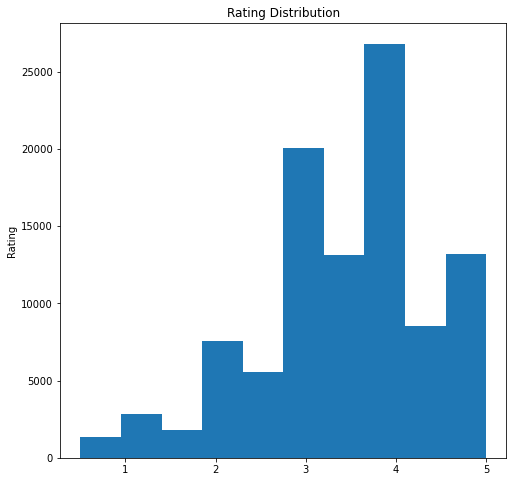

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../Data/ratings.csv')
print(data.head())

plt.figure(figsize = (8, 8))
data.rating.hist(grid=False)
plt.ylabel('Frequency')
plt.ylabel('Rating')
plt.title('Rating Distribution')
plt.show()

# 12.3 推薦電影-使用 Keras 實作使用點積的神經網路

In [51]:
# 第 1 部分
# 載入函式庫與資料集
from keras.layers import Input, Embedding, Flatten, Dot
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import pandas as pd

np.random.seed(123456)
data = pd.read_csv('../Data/ratings.csv')

In [52]:
# 'userId'    # 使用者的索引
# 'movieId'   # 電影的索引
# 'rating'    # 0到5之間的評分值
# 'timestamp' # 使用者評分的時間

In [53]:
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [54]:
# 第 2 部分
# 資料清理
def get_data(data):

    # 刪除時間
    data.drop('timestamp', axis=1, inplace=True)
    
    # 抓出所有使用者跟電影索引
    users = data.userId.unique()
    movies = data.movieId.unique()
 
    # 找出新索引跟原始索引的對應關係
    # 原始索引是moveies[i]，會改成i
    moviemap={}
    for i in range(len(movies)):
        moviemap[movies[i]]=i
    usermap={}
    for i in range(len(users)):
        usermap[users[i]]=i
    
    # 根據對應關係，將原始索引更改成新索(連續整數值)
    data.movieId = data.movieId.apply(lambda x: moviemap[x])    
    data.userId = data.userId.apply(lambda x: usermap[x])    
        
    # 打亂資料
    data = data.sample(frac=1.0).reset_index(drop=True)
    
    # 建立訓練資料、測試資料集
    train, test = train_test_split(data, test_size=0.2)
    
    n_users = len(users)
    n_movies = len(movies)

    return train, test, n_users, n_movies

train, test, n_users, n_movies = get_data(data)

In [55]:
print(train) # DataFrame
print(test)  # DataFrame

       userId  movieId  rating
83462      62     3140     5.0
5538      596     2425     2.0
267       489      941     3.0
52715     274     6347     5.0
78791     454      472     3.0
...       ...      ...     ...
86006     167     1103     5.0
27890      99      147     4.0
69284     598     1033     3.5
32154     379     1054     5.0
44005     462       42     3.5

[80668 rows x 3 columns]
       userId  movieId  rating
44019     379     1647     4.0
87173     408       44     5.0
9004       73     2202     3.5
14862     199     1513     4.5
19754     102     1168     4.5
...       ...      ...     ...
74170     306     2679     2.5
21465     104     1815     3.5
35907     595     1831     3.5
36610      68       20     4.0
71165     473     8409     3.5

[20168 rows x 3 columns]


In [56]:
print(n_users)
print(n_movies)

610
9724


## 神經網路的有2個嵌入層，一個用於處理電影索引，另一個用於處理使用者索引。神經網路會先使用輸入層來接收索引，此層的輸入會送到嵌入層，並將每一個索引轉換到五維空間，最後通過展平層，即可做點積運算，得到最終的預測值。

###  keras.layers模組包含需要的網路結構
### 輸入層 Input:接收資料
### 嵌入層 Embedding:實作嵌入層
### 展平層 Flatten:將n維張量轉換為一維張量
### 點積層 Dot:實作點積運算

In [57]:
# 第 3 部分
# 建立神經網路結構

fts = 5 # 嵌入層的輸出維度

# 輸入層接收資料
# 嵌入層將資料轉換成5維矩陣
# 展平層將5維矩陣拉直成陣列

# 處理電影索引的嵌入層
movie_in = Input(shape=[1], name="Movie")
mov_embed = Embedding(n_movies, fts, name="Movie_Embed")(movie_in)
flat_movie = Flatten(name="FlattenM")(mov_embed)


# 處理使用者索引的嵌入層
user_in = Input(shape=[1], name="User")
user_inuser_embed = Embedding(n_users, fts, name="User_Embed")(user_in)
flat_user = Flatten(name="FlattenU")(user_inuser_embed)

# 計算點積
prod = Dot(name="Mult", axes=1)([flat_movie, flat_user])

# 編譯模型
model = Model([user_in, movie_in], prod)
model.compile('adam', 'mean_squared_error')
model.summary() 

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie_Embed (Embedding)         (None, 1, 5)         48620       Movie[0][0]                      
__________________________________________________________________________________________________
User_Embed (Embedding)          (None, 1, 5)         3050        User[0][0]                       
____________________________________________________________________________________________

In [60]:
# 第 4 部分
# 訓練神經網路
model.fit([train.userId, train.movieId], train.rating, epochs=10, verbose=1)

# 評估神經網路
print("MSE:", 
      metrics.mean_squared_error(test.rating, 
                                 model.predict([test.userId, 
                                                test.movieId])))


Epoch 1/10
80668/80668 [==============================] - 3s 35us/step - loss: 12.1260
Epoch 2/10
80668/80668 [==============================] - 3s 36us/step - loss: 5.4187
Epoch 3/10
80668/80668 [==============================] - 2s 30us/step - loss: 2.7344
Epoch 4/10
80668/80668 [==============================] - 3s 31us/step - loss: 1.8298
Epoch 5/10
80668/80668 [==============================] - 3s 32us/step - loss: 1.3970
Epoch 6/10
80668/80668 [==============================] - 2s 31us/step - loss: 1.1579
Epoch 7/10
80668/80668 [==============================] - 3s 32us/step - loss: 1.0113
Epoch 8/10
80668/80668 [==============================] - 2s 31us/step - loss: 0.9161
Epoch 9/10
80668/80668 [==============================] - 2s 31us/step - loss: 0.8507
Epoch 10/10
80668/80668 [==============================] - 3s 31us/step - loss: 0.8021
MSE: 1.2838826160222194
